In [43]:
import pandas as pd
import numpy as np
from joblib import load
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [44]:
X, y = load('../../preprocessing/clustering_data.joblib')
X.head()

,Belts,PersonalInjury,PropertyDamage,CommercialLicense,CommercialVehicle,ContributedToAccident,Gender,VehicleType_'02 - Automobile',VehicleType_'03 - Station Wagon',VehicleType_'04 - Limousine',...,Model_VAN,Model_VERSA,Model_VN,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,ArrestType_Marked Patrol,ArrestType_Unmarked Patrol
0,-0.188036,-0.107601,-0.14066,-0.173900,-0.069214,-0.156898,1.428003,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,-0.679667,-0.521663,-0.236043,1.345395,0.431566,-0.225375
1,-0.188036,-0.107601,-0.14066,-0.173900,-0.069214,-0.156898,-0.700278,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,-0.679667,-0.521663,4.236511,-0.743276,0.431566,-0.225375
2,-0.188036,-0.107601,-0.14066,-0.173900,-0.069214,-0.156898,-0.700278,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,1.471309,-0.521663,-0.236043,-0.743276,-2.317144,4.437056
3,-0.188036,-0.107601,-0.14066,-0.173900,-0.069214,-0.156898,-0.700278,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,1.471309,-0.521663,-0.236043,-0.743276,0.431566,-0.225375
4,-0.188036,-0.107601,-0.14066,5.750436,-0.069214,-0.156898,-0.700278,0.361115,-0.129298,-0.023057,...,-0.133037,-0.10026,-0.139808,-0.250806,-0.679667,-0.521663,-0.236043,1.345395,0.431566,-0.225375


In [45]:
pca=PCA()
X=pd.DataFrame(pca.fit_transform(X))

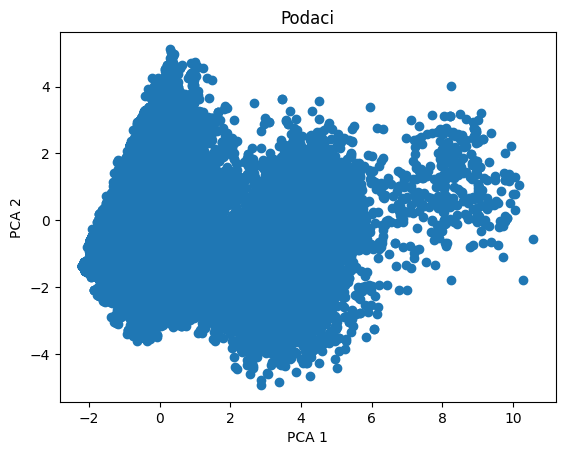

In [46]:
plt.figure()
plt.scatter(X[0],X[1])
plt.title("Podaci")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [47]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1,min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.1, min_samples=3)

In [48]:
dbscan.labels_

array([ 0, -1, -1, ..., -1, -1, -1], dtype=int64)

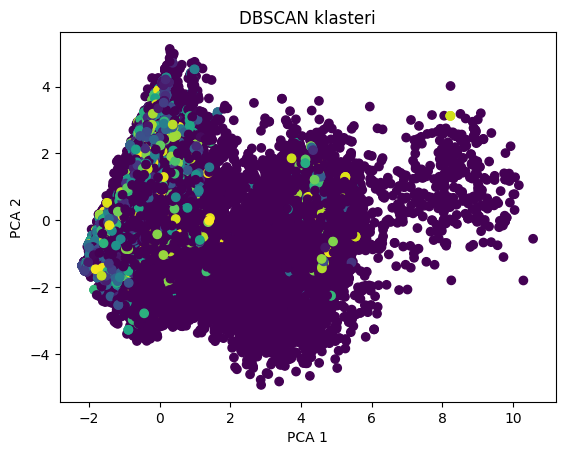

In [49]:
X['DBSCAN_labels'] = dbscan.labels_ 
plt.figure()
plt.scatter(X[0], X[1], c = X['DBSCAN_labels'])
plt.title('DBSCAN klasteri')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [50]:
from sklearn import metrics
metrics.silhouette_score(X, X['DBSCAN_labels'])

0.2124265816275008

Na osnovu silueta koeficijenta možemo zaključiti da postoje pogrešno grupisani podaci.